In [12]:
import os
import matplotlib.pyplot as plt
from scipy.io import wavfile
import kapre
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Lambda, Permute
#from kapre.time_frequency import Melspectrogram, Spectrogram
from kapre.composed import get_melspectrogram_layer, get_stft_magnitude_layer
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

plt.style.use('ggplot')

In [13]:
# Define input layer
input_audio = Input(shape=(16000, 1), name="audio_input")

# Add STFT layer
stft_layer = get_stft_magnitude_layer(
    n_fft=512,
    win_length=400,
    hop_length=160,
    return_decibel=True,
    name='spectrogram'
)(input_audio)

# Build the STFT model
stft_model = Model(inputs=input_audio, outputs=stft_layer, name="STFT_Model")

# Add MelSpectrogram layer
mel_layer = get_melspectrogram_layer(
    n_mels=128,
    n_fft=512,
    hop_length=160,
    return_decibel=True,
    name='melspectrogram'
)(input_audio)

# Build the MelSpectrogram model
mel_model = Model(inputs=input_audio, outputs=mel_layer, name="MelSpectrogram_Model")

# Summary to verify the models
stft_model.summary()
mel_model.summary()


Model: "STFT_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ audio_input (InputLayer)             │ (None, 16000, 1)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spectrogram (Sequential)             │ (None, 98, 257, 1)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "MelSpectrogram_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ audio_input (InputLayer)             │ (None, 16000, 1)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ melspectrogram (Sequential)          │ (None, 97, 128, 1)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
def plot_signals_time(titles, signals):
    
    nrows, ncols = 3, 3
    fig, ax = plt.subplots(nrows, ncols, figsize=(16, 6))
    
    z = 0
    for i in range(nrows):
        for y in range(ncols):
            ax[i,y].set_title(titles[z])
            ax[i,y].plot(signals[z])
            ax[i,y].set_xticks([])
            ax[i,y].set_yticks([])
            ax[i,y].grid(False)
            z += 1
    
    plt.show()

In [4]:
def plot_spectrogram(titles, signals, title, shape=(16,8)):
    nrows, ncols = 3, 3
    fig, ax = plt.subplots(nrows, ncols, figsize=shape)
    fig.suptitle(title, size=20)
    plt.set_cmap('viridis')
    
    z = 0
    for i in range(nrows):
        for y in range(ncols):
            ax[i,y].set_title(titles[z])
            ax[i,y].imshow(signals[z].squeeze())
            ax[i,y].set_xticks([])
            ax[i,y].set_yticks([])
            ax[i,y].grid(False)
            z += 1
    
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


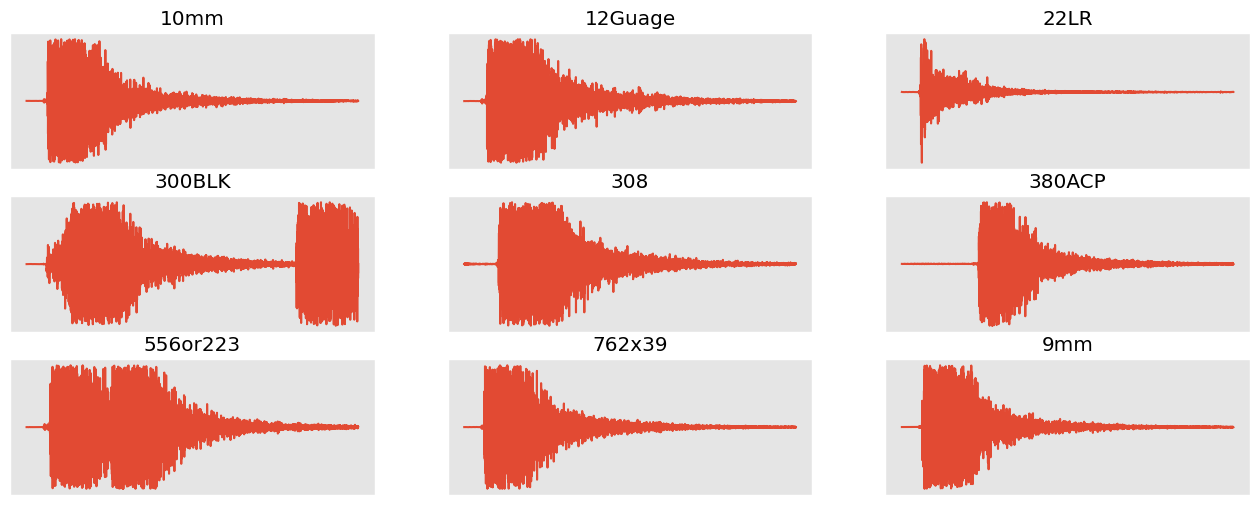

In [5]:
src_root = '../clean'

classes = os.listdir(src_root)
signals = []
titles = []
stft_specs = []
mel_specs = []

for _cls in sorted(classes):
    for fn in sorted(os.listdir(os.path.join(src_root, _cls))):
        rate, wav = wavfile.read(os.path.join(src_root, _cls, fn))
        signals.append(wav)
        titles.append(_cls)
        
        
        # Example audio signal (reshape your audio to have a single channel and match the length)
        wav = np.random.rand(16000)  # Simulated 1-second audio sample at 16 kHz
        wav = wav.reshape(1, -1, 1)  # Reshape to (batch_size, time_steps, channels
        spec = stft_model.predict(wav)
        mel = mel_model.predict(wav)
        stft_specs.append(spec)
        mel_specs.append(mel)
        break
        

        # Print results
        print("STFT Output Shape:", spec.shape)
        print("MelSpectrogram Output Shape:", mel.shape)

plot_signals_time(titles, signals)

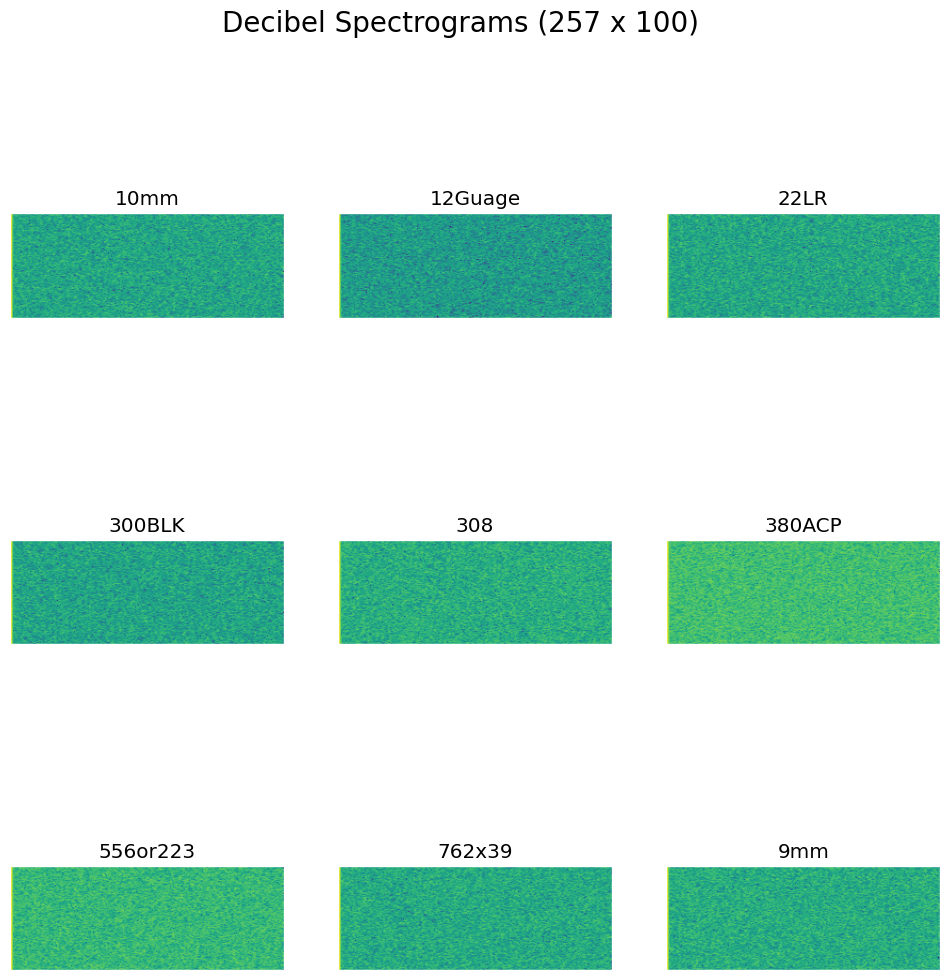

In [6]:
plot_spectrogram(titles, stft_specs, title= 'Decibel Spectrograms (257 x 100)',shape=(12,12))

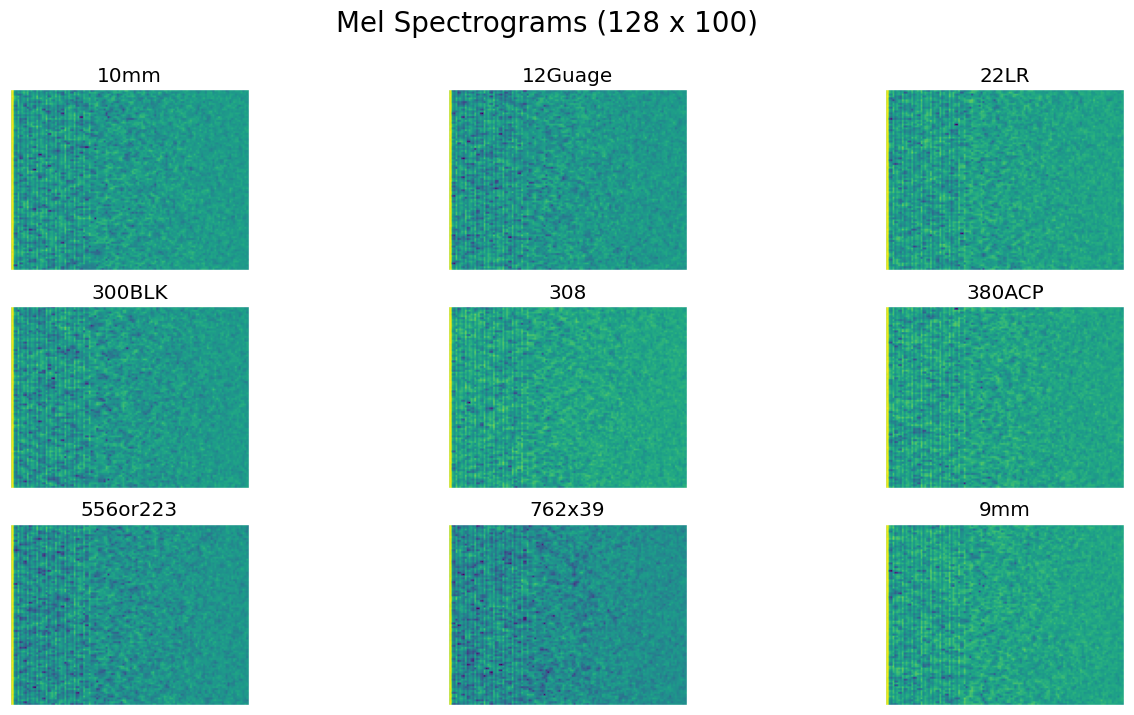

In [7]:
plot_spectrogram(titles, mel_specs, title='Mel Spectrograms (128 x 100)', shape=(16,8))

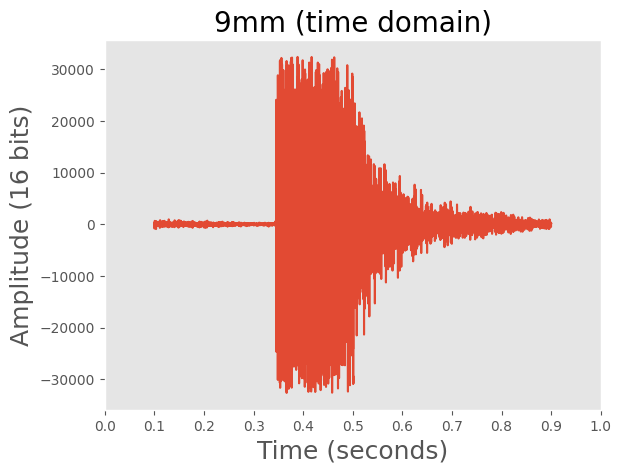

In [9]:
rate, wav = wavfile.read(os.path.join(src_root, '9mm', '9mm5yrds_aux_shot1_1.wav'))

plt.plot(wav)
plt.title('9mm (time domain)', size=20)
plt.grid(False)
locs, labels = plt.xticks()
plt.xticks(locs, ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])
plt.ylabel('Amplitude (16 bits)', size=18)
plt.xlabel('Time (seconds)', size=18)
plt.show()

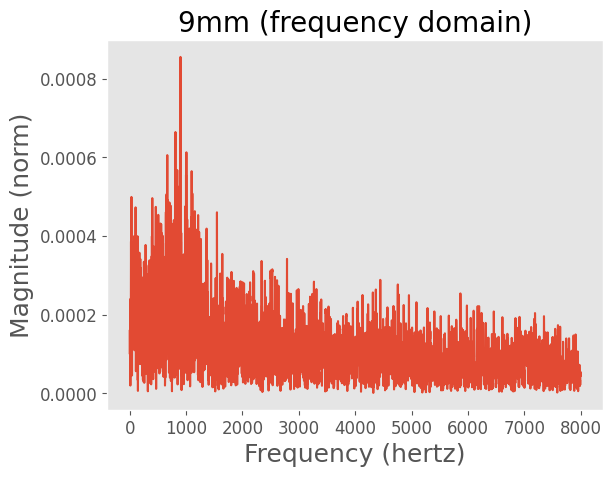

In [10]:
fft = np.fft.rfft(wav)
plt.plot(np.abs(fft)/np.sum(np.abs(fft)))
plt.title('9mm (frequency domain)', size=20)
plt.grid(False)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Magnitude (norm)', size=18)
plt.xlabel('Frequency (hertz)', size=18)
plt.show()